<a href="https://colab.research.google.com/github/Lucas-Welter/Dog_Recognition_NN/blob/main/Dog_Species_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import urllib.request
import os
from PIL import Image,ImageStat
import numpy as np
import matplotlib.pyplot as plt

import torchvision
import torch
import torch.nn as nn
from torch.utils.data import  DataLoader
import torchvision.transforms as transforms

from torch import optim 
import sklearn.metrics as metrics

In [ ]:
import torch.nn.functional as F

# Dog Species Recognition Neural Network

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
main_dir = "/content/drive/MyDrive/cachorros"

In [ ]:
os.chdir(main_dir)

In [ ]:
ls

 akita/            'cachorro rottweiler'/      pastorAlemao.csv
 akita.csv         'cachorro rottweiler.csv'   pinscher/
 beagle/            chowChow/                  pinscher.csv
 beagle.csv         chowChow.csv               pitbull/
 best_model2.pth    dalmata/                   pitbull.csv
 best_model3.pth    dalmata.csv                poodle/
 best_model.pth     galgo/                     poodle.csv
 bloodhound/        galgo.csv                  pug/
 bloodhound.csv     goldenRetriever/           pug.csv
 bordercollie/      goldenRetriever.csv        README.txt
 bordercollie.csv   huskySiberiano/            sharpei/
 bulldog/           huskySiberiano.csv         sharpei.csv
 bulldog.csv        labrador/                  yorkshire/
 bullTerrier/       labrador.csv               yorkshire.csv
 bullTerrier.csv    pastorAlemao/


# Building the Loader

In [ ]:
def image_loader(img):
    return Image.open(img).convert("RGB")

In [ ]:
img = image_loader('./beagle/3212400111_52c4e1905a_n.jpg')

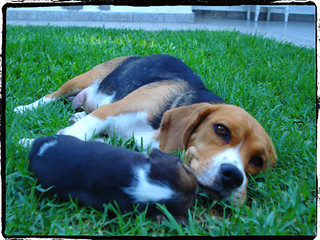

In [ ]:
img

In [ ]:
tconvert = transforms.Resize((224,224))

In [ ]:
transform = transforms.Compose([transforms.Resize((224,224)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
                            ])

In [ ]:
img_tensor = transform(img)

In [ ]:
img_tensor.shape

torch.Size([3, 224, 224])

# Dataset Class

In [ ]:
!ls

 akita		   'cachorro rottweiler'       pastorAlemao.csv
 akita.csv	   'cachorro rottweiler.csv'   pinscher
 beagle		    chowChow		       pinscher.csv
 beagle.csv	    chowChow.csv	       pitbull
 best_model2.pth    dalmata		       pitbull.csv
 best_model3.pth    dalmata.csv		       poodle
 best_model.pth     galgo		       poodle.csv
 bloodhound	    galgo.csv		       pug
 bloodhound.csv     goldenRetriever	       pug.csv
 bordercollie	    goldenRetriever.csv        README.txt
 bordercollie.csv   huskySiberiano	       sharpei
 bulldog	    huskySiberiano.csv	       sharpei.csv
 bulldog.csv	    labrador		       yorkshire
 bullTerrier	    labrador.csv	       yorkshire.csv
 bullTerrier.csv    pastorAlemao


In [ ]:
dir = './'

In [ ]:
for file_names in os.scandir('./'):
    print(file_names)

<DirEntry 'poodle.csv'>
<DirEntry 'pinscher.csv'>
<DirEntry 'bulldog.csv'>
<DirEntry 'pastorAlemao.csv'>
<DirEntry 'labrador.csv'>
<DirEntry 'beagle.csv'>
<DirEntry 'pitbull.csv'>
<DirEntry 'yorkshire.csv'>
<DirEntry 'huskySiberiano.csv'>
<DirEntry 'goldenRetriever.csv'>
<DirEntry 'bloodhound.csv'>
<DirEntry 'bordercollie.csv'>
<DirEntry 'chowChow.csv'>
<DirEntry 'dalmata.csv'>
<DirEntry 'galgo.csv'>
<DirEntry 'sharpei.csv'>
<DirEntry 'cachorro rottweiler.csv'>
<DirEntry 'bullTerrier.csv'>
<DirEntry 'pug.csv'>
<DirEntry 'beagle'>
<DirEntry 'bloodhound'>
<DirEntry 'bordercollie'>
<DirEntry 'bulldog'>
<DirEntry 'bullTerrier'>
<DirEntry 'chowChow'>
<DirEntry 'dalmata'>
<DirEntry 'galgo'>
<DirEntry 'goldenRetriever'>
<DirEntry 'huskySiberiano'>
<DirEntry 'labrador'>
<DirEntry 'pastorAlemao'>
<DirEntry 'pinscher'>
<DirEntry 'pitbull'>
<DirEntry 'poodle'>
<DirEntry 'pug'>
<DirEntry 'sharpei'>
<DirEntry 'yorkshire'>
<DirEntry 'cachorro rottweiler'>
<DirEntry 'akita'>
<DirEntry 'akita.csv'>
<D

In [ ]:
classes = [d.name for d in os.scandir(dir) if d.is_dir()]

In [ ]:
classes

['beagle',
 'bloodhound',
 'bordercollie',
 'bulldog',
 'bullTerrier',
 'chowChow',
 'dalmata',
 'galgo',
 'goldenRetriever',
 'huskySiberiano',
 'labrador',
 'pastorAlemao',
 'pinscher',
 'pitbull',
 'poodle',
 'pug',
 'sharpei',
 'yorkshire',
 'cachorro rottweiler',
 'akita']

In [ ]:
class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}

In [ ]:
class_to_idx

{'beagle': 0,
 'bloodhound': 1,
 'bordercollie': 2,
 'bulldog': 3,
 'bullTerrier': 4,
 'chowChow': 5,
 'dalmata': 6,
 'galgo': 7,
 'goldenRetriever': 8,
 'huskySiberiano': 9,
 'labrador': 10,
 'pastorAlemao': 11,
 'pinscher': 12,
 'pitbull': 13,
 'poodle': 14,
 'pug': 15,
 'sharpei': 16,
 'yorkshire': 17,
 'cachorro rottweiler': 18,
 'akita': 19}

In [ ]:
instances = []
for target_class in sorted(class_to_idx.keys()):
        class_index = class_to_idx[target_class]
        target_dir = os.path.join(dir, target_class)
        for root, _, fnames in sorted(os.walk(target_dir, followlinks=True)):
            for fname in sorted(fnames):
                path = os.path.join(root, fname)
                item = path, class_index
                instances.append(item)

In [ ]:
instances

[('./akita/10387923145_d7862c8769_m.jpg', 19),
 ('./akita/106596984_fff2c7d32e_m.jpg', 19),
 ('./akita/10898137784_77d73b5122_n.jpg', 19),
 ('./akita/11242870974_3ebe96dc9e_n.jpg', 19),
 ('./akita/11523589896_37e6eda5d2_n.jpg', 19),
 ('./akita/11528077396_495021e750_n.jpg', 19),
 ('./akita/11593544646_d539189b5b_w.jpg', 19),
 ('./akita/11675400965_fe62a1ceda_n.jpg', 19),
 ('./akita/11676179776_39dc2edf1f_n.jpg', 19),
 ('./akita/12170156226_6909c595a0_m.jpg', 19),
 ('./akita/12292651606_2c8055c8bf_w.jpg', 19),
 ('./akita/1255928226_e6fad2115b_m.jpg', 19),
 ('./akita/12839903553_124e99f8ae_n.jpg', 19),
 ('./akita/14555781696_e1e76b1cb4_n.jpg', 19),
 ('./akita/14631970615_566192dbfd_n.jpg', 19),
 ('./akita/14695370660_4d25e9d4cf_n.jpg', 19),
 ('./akita/14708212355_87cf11d656_n.jpg', 19),
 ('./akita/14738128580_e9986b1be4_n.jpg', 19),
 ('./akita/14781387168_3295e048e1_n.jpg', 19),
 ('./akita/15063824714_7f460b67e9_n.jpg', 19),
 ('./akita/15160009830_7be732e286_w.jpg', 19),
 ('./akita/15163

In [ ]:
from torch.utils.data import Dataset

from typing import Any,Tuple

class CachorrosDataset(Dataset):
    def __init__(self,dir,transform=None,target_transform=None,loader = None):
        self.main_dir = dir
        self.transform = transform
        self.target_transform = target_transform
        self.classes = [d.name for d in os.scandir(dir) if d.is_dir()]
        self.classes.sort()
        self.class_to_idx = {cls_name: i for i, cls_name in enumerate(self.classes)}
        self.targets = []
        self.instances = self.make_instances()
        self.loader = loader
        
        if loader is None:
            self.loader = lambda x: Image.open(x).convert('RGB')

    def make_instances(self):
        instances = []
        targets = []
        for target_class in sorted(self.class_to_idx.keys()):
                class_index = self.class_to_idx[target_class]
                target_dir = os.path.join(self.main_dir, target_class)
                for root, _, fnames in sorted(os.walk(target_dir, followlinks=True)):
                    for fname in sorted(fnames):
                        path = os.path.join(root, fname)
                        item = path, class_index
                        targets.append(class_index)
                        instances.append(item)
        self.targets = torch.tensor(targets)
        return instances
    def __getitem__(self,index:int) -> Tuple[Any,Any]:
        path, target = self.instances[index]
        instance = self.loader(path)
        if self.transform is not None:
            instance = self.transform(instance)
        if self.target_transform is not None:
            target = self.target_transform(target)
        return instance,target
    def __len__(self) -> int:
        return len(self.instances)


In [ ]:
dataset = CachorrosDataset('./',transform=transform)

In [ ]:
len(dataset)

5000

In [ ]:
#dataset = torchvision.datasets.DatasetFolder('./',loader = image_loader,extensions='jpg',transform=transform )

# Training the network

In [ ]:
ds = dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
np.unique(ds.targets,return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 array([250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250,
        250, 250, 250, 250, 250, 250, 250]))

In [ ]:
bs = 16
train_idx, temp_idx = train_test_split(np.arange(len(ds)),test_size=0.3,shuffle=True,stratify=ds.targets)
valid_idx, test_idx = train_test_split(temp_idx,test_size=0.5,shuffle=True,stratify=ds.targets[temp_idx])
 
train_sampler = torch.utils.data.SubsetRandomSampler(train_idx)
valid_sampler = torch.utils.data.SubsetRandomSampler(valid_idx)
test_sampler  = torch.utils.data.SubsetRandomSampler(test_idx)
 
dl_train = torch.utils.data.DataLoader(ds,batch_size=bs,sampler=train_sampler)
dl_valid = torch.utils.data.DataLoader(ds,batch_size=bs,sampler=valid_sampler)
dl_test  = torch.utils.data.DataLoader(ds,batch_size=bs,sampler=test_sampler)

In [ ]:
np.unique(ds.targets[train_idx],return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 array([175, 175, 175, 175, 175, 175, 175, 175, 175, 175, 175, 175, 175,
        175, 175, 175, 175, 175, 175, 175]))

In [ ]:
np.unique(ds.targets[valid_idx],return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 array([38, 37, 38, 38, 37, 38, 37, 37, 38, 37, 38, 38, 37, 38, 37, 38, 37,
        38, 37, 37]))

In [ ]:
np.unique(ds.targets[test_idx],return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 array([37, 38, 37, 37, 38, 37, 38, 38, 37, 38, 37, 37, 38, 37, 38, 37, 38,
        37, 38, 38]))

In [ ]:
x,y = next(iter(dl_train))

In [ ]:
x.shape,y.shape

(torch.Size([16, 3, 224, 224]), torch.Size([16]))

In [ ]:
device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')

In [ ]:
device

device(type='cuda', index=0)

In [ ]:
#torch.cuda.get_device_properties(0)


In [ ]:
loss_train = []
loss_eval  = []

In [ ]:
patience_time = 15

In [ ]:
model = torchvision.models.efficientnet_b0(weights = torchvision.models.EfficientNet_B0_Weights)
model.classifier[1] = nn.Linear(1280,20)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
model.to(device)

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [ ]:
model2 = torchvision.models.shufflenet_v2_x2_0(weights = torchvision.models.ShuffleNet_V2_X2_0_Weights)
model2.fc = nn.Linear(2048,20)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ShuffleNet_V2_X2_0_Weights.IMAGENET1K_V1`. You can also use `weights=ShuffleNet_V2_X2_0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
model2.to(device)

ShuffleNetV2(
  (conv1): Sequential(
    (0): Conv2d(3, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (stage2): Sequential(
    (0): InvertedResidual(
      (branch1): Sequential(
        (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=24, bias=False)
        (1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): Conv2d(24, 122, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (3): BatchNorm2d(122, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (4): ReLU(inplace=True)
      )
      (branch2): Sequential(
        (0): Conv2d(24, 122, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNorm2d(122, eps=1e-05, momentum=0.1, affine=True, track_runn

In [ ]:
model3 = torchvision.models.mnasnet1_3(weights = torchvision.models.MNASNet1_3_Weights)
model3.classifier[1] = nn.Linear(1280,20)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=MNASNet1_3_Weights.IMAGENET1K_V1`. You can also use `weights=MNASNet1_3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
model3.to(device)

MNASNet(
  (layers): Sequential(
    (0): Conv2d(3, 40, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(40, eps=1e-05, momentum=0.00029999999999996696, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(40, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=40, bias=False)
    (4): BatchNorm2d(40, eps=1e-05, momentum=0.00029999999999996696, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): Conv2d(40, 24, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (7): BatchNorm2d(24, eps=1e-05, momentum=0.00029999999999996696, affine=True, track_running_stats=True)
    (8): Sequential(
      (0): _InvertedResidual(
        (layers): Sequential(
          (0): Conv2d(24, 72, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(72, eps=1e-05, momentum=0.00029999999999996696, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
          (3): Conv2d(72, 

In [ ]:
criterion = nn.CrossEntropyLoss()
opt = optim.SGD(model.parameters(),lr=0.001)


# First Model

In [ ]:
epochs = 100

stop = False
epoch = 0
lowest_loss_eval = 10000
last_best_result = 0
while (not stop):
    #wandb.watch(model)
    model.train()
    lloss = []
    for x,y in dl_train:
        x = x.to(device)
        y = y.to(device)
        pred = model(x)
        closs = criterion(pred,y)
        closs.backward()
        opt.step()
        opt.zero_grad()
        lloss.append(closs.item())
        #print(closs.item())
    loss_train.append(np.mean(lloss))
    lloss = []
    model.eval()
    lres = []
    ytrue = []
    with torch.no_grad():
        for data,y in dl_valid:
            data = data.to(device)

            pred = model(data)
            closs = criterion(pred.cpu(),y)
            lloss.append(closs.item())
            res  = pred.argmax(dim=1).cpu().tolist()
            lres += res
            ytrue += y
    avg_loss_eval = np.mean(lloss)
    loss_eval.append(avg_loss_eval)
    #wandb.log({"loss_eval": avg_loss_eval,"loss_train":loss_train[-1]})
    if avg_loss_eval < lowest_loss_eval:
        lowest_loss_eval = avg_loss_eval 
        last_best_result = 0
        print("Best model found! saving...")
        actual_state = {'optim':opt.state_dict(),'model':model.state_dict(),'epoch':epoch,'loss_train':loss_train,'loss_eval':loss_eval}
        torch.save(actual_state,'best_model.pth')
    last_best_result += 1
    if last_best_result > patience_time:
        stop = True
    print("epoch %d loss_train %4.3f loss_eval %4.3f last_best %d"%(epoch,loss_train[-1],loss_eval[-1],last_best_result))
    epoch += 1

Best model found! saving...
epoch 0 loss_train 2.927 loss_eval 2.804 last_best 1
Best model found! saving...
epoch 1 loss_train 2.733 loss_eval 2.601 last_best 1
Best model found! saving...
epoch 2 loss_train 2.531 loss_eval 2.386 last_best 1
Best model found! saving...
epoch 3 loss_train 2.327 loss_eval 2.143 last_best 1
Best model found! saving...
epoch 4 loss_train 2.101 loss_eval 1.921 last_best 1
Best model found! saving...
epoch 5 loss_train 1.887 loss_eval 1.678 last_best 1
Best model found! saving...
epoch 6 loss_train 1.665 loss_eval 1.489 last_best 1
Best model found! saving...
epoch 7 loss_train 1.478 loss_eval 1.289 last_best 1
Best model found! saving...
epoch 8 loss_train 1.312 loss_eval 1.129 last_best 1
Best model found! saving...
epoch 9 loss_train 1.187 loss_eval 1.021 last_best 1
Best model found! saving...
epoch 10 loss_train 1.066 loss_eval 0.897 last_best 1
Best model found! saving...
epoch 11 loss_train 0.977 loss_eval 0.805 last_best 1
Best model found! saving..

In [ ]:
recover = torch.load('best_model.pth')
#actual_state = {'optim':opt.state_dict(),'model':model.state_dict(),'epoch':epoch}

In [ ]:
opt.load_state_dict(recover['optim'])
model.load_state_dict(recover['model'])
loss_train = recover['loss_train']
loss_eval = recover['loss_eval']
epoch = recover['epoch']

In [ ]:
epoch

107

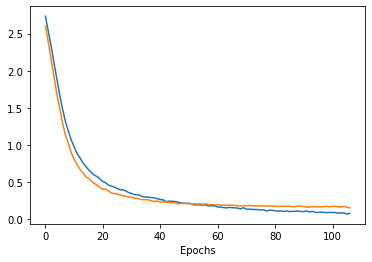

In [ ]:
import matplotlib.pyplot as plt


fig = plt.figure()
plt.plot(loss_train[1:])
plt.plot(loss_eval[1:])
plt.xlabel('Epochs')
plt.show()

In [ ]:
import sklearn.metrics as metrics

In [ ]:
model.to(device)

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [ ]:
model.eval()
lres = []
ytrue = []
with torch.no_grad():
    for data,target in dl_test:
        data = data.to(device)
        pred = model(data)
        res  = pred.argmax(dim=1).cpu().tolist()
        lres += res
        ytrue += target

In [ ]:
metrics.confusion_matrix(ytrue,lres)

array([[36,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,
         0,  0,  0,  0],
       [ 0, 37,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  2, 33,  0,  0,  0,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0,
         0,  0,  1,  0],
       [ 0,  0,  0, 37,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0, 38,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 1,  0,  0,  0,  0, 36,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 36,  0,  0,  0,  0,  0,  1,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 37,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 36,  1,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  1, 36,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0

In [ ]:
metrics.accuracy_score(ytrue,lres)

0.96

In [ ]:
metrics.precision_score(ytrue,lres,average='weighted')

0.961040891761514

In [ ]:
metrics.recall_score(ytrue,lres,average='weighted')

0.96

In [ ]:
metrics.f1_score(ytrue,lres,average='weighted')

0.9595288192951824

In [ ]:
img = image_loader('./akita/106596984_fff2c7d32e_m.jpg')

In [ ]:
timg = transform(img).view(1,3,224,224).to(device)

In [ ]:
timg.shape

torch.Size([1, 3, 224, 224])

In [ ]:
pred = model(timg)

In [ ]:
pred

tensor([[10.7463, -2.6639, -5.6718, -0.6855,  1.0402, -0.3498, -1.9125,  1.2596,
          0.0223, -2.0444, -3.0299,  5.5072, -0.9977,  0.3259, -0.2714,  0.4577,
         -0.1931, -0.5419, -0.9394, -2.7738]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

# Second Model 

In [ ]:
opt = optim.SGD(model2.parameters(),lr=0.001)


In [ ]:

epochs = 100

stop = False
epoch = 0
lowest_loss_eval = 10000
last_best_result = 0
while (not stop):
    #wandb.watch(model2)
    model2.train()
    lloss = []
    for x,y in dl_train:
        x = x.to(device)
        y = y.to(device)
        pred = model2(x)
        closs = criterion(pred,y)
        closs.backward()
        opt.step()
        opt.zero_grad()
        lloss.append(closs.item())
        #print(closs.item())
    loss_train.append(np.mean(lloss))
    lloss = []
    model2.eval()
    lres = []
    ytrue = []
    with torch.no_grad():
        for data,y in dl_valid:
            data = data.to(device)
            pred = model2(data)
            closs = criterion(pred.cpu(),y)
            lloss.append(closs.item())
            res  = pred.argmax(dim=1).cpu().tolist()
            lres += res
            ytrue += y
    avg_loss_eval = np.mean(lloss)
    loss_eval.append(avg_loss_eval)
    #wandb.log({"loss_eval": avg_loss_eval,"loss_train":loss_train[-1]})
    if avg_loss_eval < lowest_loss_eval:
        lowest_loss_eval = avg_loss_eval 
        last_best_result = 0
        print("Best model2 found! saving...")
        actual_state = {'optim':opt.state_dict(),'model2':model2.state_dict(),'epoch':epoch,'loss_train':loss_train,'loss_eval':loss_eval}
        torch.save(actual_state,'best_model2.pth')
    last_best_result += 1
    if last_best_result > patience_time:
        stop = True
    print("epoch %d loss_train %4.3f loss_eval %4.3f last_best %d"%(epoch,loss_train[-1],loss_eval[-1],last_best_result))
    epoch += 1

Best model2 found! saving...
epoch 0 loss_train 2.918 loss_eval 3.104 last_best 1
Best model2 found! saving...
epoch 1 loss_train 2.712 loss_eval 2.666 last_best 1
epoch 2 loss_train 2.485 loss_eval 2.999 last_best 2
Best model2 found! saving...
epoch 3 loss_train 2.233 loss_eval 2.201 last_best 1
Best model2 found! saving...
epoch 4 loss_train 1.969 loss_eval 1.840 last_best 1
Best model2 found! saving...
epoch 5 loss_train 1.681 loss_eval 1.533 last_best 1
Best model2 found! saving...
epoch 6 loss_train 1.441 loss_eval 1.287 last_best 1
Best model2 found! saving...
epoch 7 loss_train 1.243 loss_eval 1.103 last_best 1
Best model2 found! saving...
epoch 8 loss_train 1.073 loss_eval 0.947 last_best 1
Best model2 found! saving...
epoch 9 loss_train 0.947 loss_eval 0.863 last_best 1
Best model2 found! saving...
epoch 10 loss_train 0.845 loss_eval 0.734 last_best 1
Best model2 found! saving...
epoch 11 loss_train 0.765 loss_eval 0.672 last_best 1
Best model2 found! saving...
epoch 12 loss_

In [ ]:
recover = torch.load('best_model2.pth')
#actual_state = {'optim':opt.state_dict(),'model':model2.state_dict(),'epoch':epoch}

In [ ]:
opt.load_state_dict(recover['optim'])
model2.load_state_dict(recover['model2'])
loss_train = recover['loss_train']
loss_eval = recover['loss_eval']
epoch = recover['epoch']

In [ ]:
epoch

67

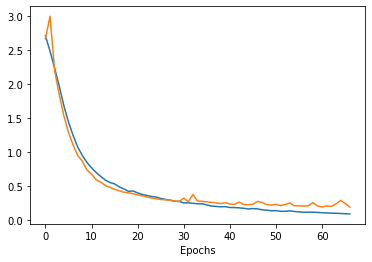

In [ ]:
import matplotlib.pyplot as plt


fig = plt.figure()
plt.plot(loss_train[1:])
plt.plot(loss_eval[1:])
plt.xlabel('Epochs')
plt.show()

In [ ]:
import sklearn.metrics as metrics

In [ ]:
model2.to(device)

ShuffleNetV2(
  (conv1): Sequential(
    (0): Conv2d(3, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (stage2): Sequential(
    (0): InvertedResidual(
      (branch1): Sequential(
        (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=24, bias=False)
        (1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): Conv2d(24, 122, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (3): BatchNorm2d(122, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (4): ReLU(inplace=True)
      )
      (branch2): Sequential(
        (0): Conv2d(24, 122, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNorm2d(122, eps=1e-05, momentum=0.1, affine=True, track_runn

In [ ]:
model2.eval()
lres = []
ytrue = []
with torch.no_grad():
    for data,target in dl_test:
        data = data.to(device)
        pred = model2(data)
        res  = pred.argmax(dim=1).cpu().tolist()
        lres += res
        ytrue += target

In [ ]:
metrics.confusion_matrix(ytrue,lres)

array([[34,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0, 34,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0, 34,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,
         0,  0,  1,  0],
       [ 0,  1,  0, 34,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0, 33,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  4,
         0,  0,  0,  0],
       [ 0,  1,  0,  0,  0, 30,  0,  0,  0,  0,  0,  0,  0,  1,  0,  2,
         0,  1,  2,  0],
       [ 0,  0,  0,  0,  0,  0, 35,  0,  0,  0,  0,  0,  2,  0,  1,  0,
         0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0, 37,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 37,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 1,  0,  0,  0,  1,  0,  0,  0,  0, 33,  2,  0,  0,  0,  0,  1,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0

In [ ]:
metrics.accuracy_score(ytrue,lres)

0.928

In [ ]:
metrics.precision_score(ytrue,lres,average='weighted')

0.9295673637528632

In [ ]:
metrics.recall_score(ytrue,lres,average='weighted')

0.928

In [ ]:
metrics.f1_score(ytrue,lres,average='weighted')

0.9280345339091076

In [ ]:
img = image_loader('./akita/106596984_fff2c7d32e_m.jpg')

In [ ]:
timg = transform(img).view(1,3,224,224).to(device)

In [ ]:
timg.shape

torch.Size([1, 3, 224, 224])

In [ ]:
pred = model2(timg)

In [ ]:
pred

tensor([[ 8.2428, -1.3891, -3.5701,  0.0894,  2.4019,  0.1772, -2.0206,  0.6691,
         -0.6107, -1.2210, -1.2257,  3.0744,  0.2585,  0.7412,  0.9864,  0.8128,
         -0.9949, -1.7316, -2.0791, -1.9038]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

# Third Model

In [ ]:
opt = optim.SGD(model3.parameters(),lr=0.001)

In [ ]:
epochs = 100

stop = False
epoch = 0
lowest_loss_eval = 10000
last_best_result = 0
while (not stop):
    #wandb.watch(model3)
    model3.train()
    lloss = []
    for x,y in dl_train:
        x = x.to(device)
        y = y.to(device)
        pred = model3(x)
        closs = criterion(pred,y)
        closs.backward()
        opt.step()
        opt.zero_grad()
        lloss.append(closs.item())
        #print(closs.item())
    loss_train.append(np.mean(lloss))
    lloss = []
    model3.eval()
    lres = []
    ytrue = []
    with torch.no_grad():
        for data,y in dl_valid:
            data = data.to(device)

            pred = model3(data)
            closs = criterion(pred.cpu(),y)
            lloss.append(closs.item())
            res  = pred.argmax(dim=1).cpu().tolist()
            lres += res
            ytrue += y
    avg_loss_eval = np.mean(lloss)
    loss_eval.append(avg_loss_eval)
    #wandb.log({"loss_eval": avg_loss_eval,"loss_train":loss_train[-1]})
    if avg_loss_eval < lowest_loss_eval:
        lowest_loss_eval = avg_loss_eval 
        last_best_result = 0
        print("Best model3 found! saving...")
        actual_state = {'optim':opt.state_dict(),'model3':model3.state_dict(),'epoch':epoch,'loss_train':loss_train,'loss_eval':loss_eval}
        torch.save(actual_state,'best_model3.pth')
    last_best_result += 1
    if last_best_result > patience_time:
        stop = True
    print("epoch %d loss_train %4.3f loss_eval %4.3f last_best %d"%(epoch,loss_train[-1],loss_eval[-1],last_best_result))
    epoch += 1

Best model3 found! saving...
epoch 0 loss_train 2.905 loss_eval 2.777 last_best 1
Best model3 found! saving...
epoch 1 loss_train 2.664 loss_eval 2.530 last_best 1
Best model3 found! saving...
epoch 2 loss_train 2.399 loss_eval 2.255 last_best 1
Best model3 found! saving...
epoch 3 loss_train 2.089 loss_eval 1.945 last_best 1
Best model3 found! saving...
epoch 4 loss_train 1.784 loss_eval 1.639 last_best 1
Best model3 found! saving...
epoch 5 loss_train 1.488 loss_eval 1.366 last_best 1
Best model3 found! saving...
epoch 6 loss_train 1.255 loss_eval 1.148 last_best 1
Best model3 found! saving...
epoch 7 loss_train 1.058 loss_eval 0.976 last_best 1
Best model3 found! saving...
epoch 8 loss_train 0.922 loss_eval 0.847 last_best 1
Best model3 found! saving...
epoch 9 loss_train 0.825 loss_eval 0.744 last_best 1
Best model3 found! saving...
epoch 10 loss_train 0.740 loss_eval 0.662 last_best 1
Best model3 found! saving...
epoch 11 loss_train 0.660 loss_eval 0.597 last_best 1
Best model3 fo

In [ ]:
recover = torch.load('best_model3.pth')
#actual_state = {'optim':opt.state_dict(),'mode3':model3.state_dict(),'epoch':epoch}

In [ ]:
opt.load_state_dict(recover['optim'])
model3.load_state_dict(recover['model3'])
loss_train = recover['loss_train']
loss_eval = recover['loss_eval']
epoch = recover['epoch']

In [ ]:
epoch

52

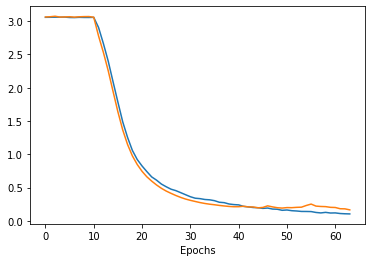

In [ ]:
import matplotlib.pyplot as plt


fig = plt.figure()
plt.plot(loss_train[1:])
plt.plot(loss_eval[1:])
plt.xlabel('Epochs')
plt.show()

In [ ]:
import sklearn.metrics as metrics

In [ ]:
model3.to(device)

MNASNet(
  (layers): Sequential(
    (0): Conv2d(3, 40, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(40, eps=1e-05, momentum=0.00029999999999996696, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(40, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=40, bias=False)
    (4): BatchNorm2d(40, eps=1e-05, momentum=0.00029999999999996696, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): Conv2d(40, 24, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (7): BatchNorm2d(24, eps=1e-05, momentum=0.00029999999999996696, affine=True, track_running_stats=True)
    (8): Sequential(
      (0): _InvertedResidual(
        (layers): Sequential(
          (0): Conv2d(24, 72, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(72, eps=1e-05, momentum=0.00029999999999996696, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
          (3): Conv2d(72, 

In [ ]:
model3.eval()
lres = []
ytrue = []
with torch.no_grad():
    for data,target in dl_test:
        data = data.to(device)
        pred = model3(data)
        res  = pred.argmax(dim=1).cpu().tolist()
        lres += res
        ytrue += target

In [ ]:
metrics.confusion_matrix(ytrue,lres)

array([[32,  1,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  2,  0,  0,
         0,  0,  0,  0],
       [ 0, 34,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,
         0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  1,  1,
         0,  0,  1,  0],
       [ 0,  0,  0, 37,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0, 38,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  1, 32,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,
         0,  2,  2,  0],
       [ 0,  0,  0,  0,  0,  0, 35,  0,  0,  0,  0,  0,  0,  1,  1,  0,
         0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0, 36,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 35,  0,  0,  0,  0,  0,  0,  2,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  0, 35,  1,  0,  0,  0,  0,  1,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0

In [ ]:
metrics.accuracy_score(ytrue,lres)

0.94

In [ ]:
metrics.precision_score(ytrue,lres,average='weighted')

0.9418900787987835

In [ ]:
metrics.recall_score(ytrue,lres,average='weighted')

0.94

In [ ]:
metrics.f1_score(ytrue,lres,average='weighted')

0.9398929339226318

In [ ]:
img = image_loader('./akita/106596984_fff2c7d32e_m.jpg')

In [ ]:
timg = transform(img).view(1,3,224,224).to(device)

In [ ]:
timg.shape

torch.Size([1, 3, 224, 224])

In [ ]:
pred = model3(timg)

In [ ]:
pred

tensor([[ 9.3842, -1.8626, -3.4481,  0.0823,  0.7532, -1.6928, -2.7446,  2.8022,
         -0.6973, -0.7708, -1.7658,  4.4638, -0.6692,  0.5638,  0.1092, -0.1528,
         -0.8216, -1.2200, -0.5751, -2.0292]], device='cuda:0',
       grad_fn=<AddmmBackward0>)